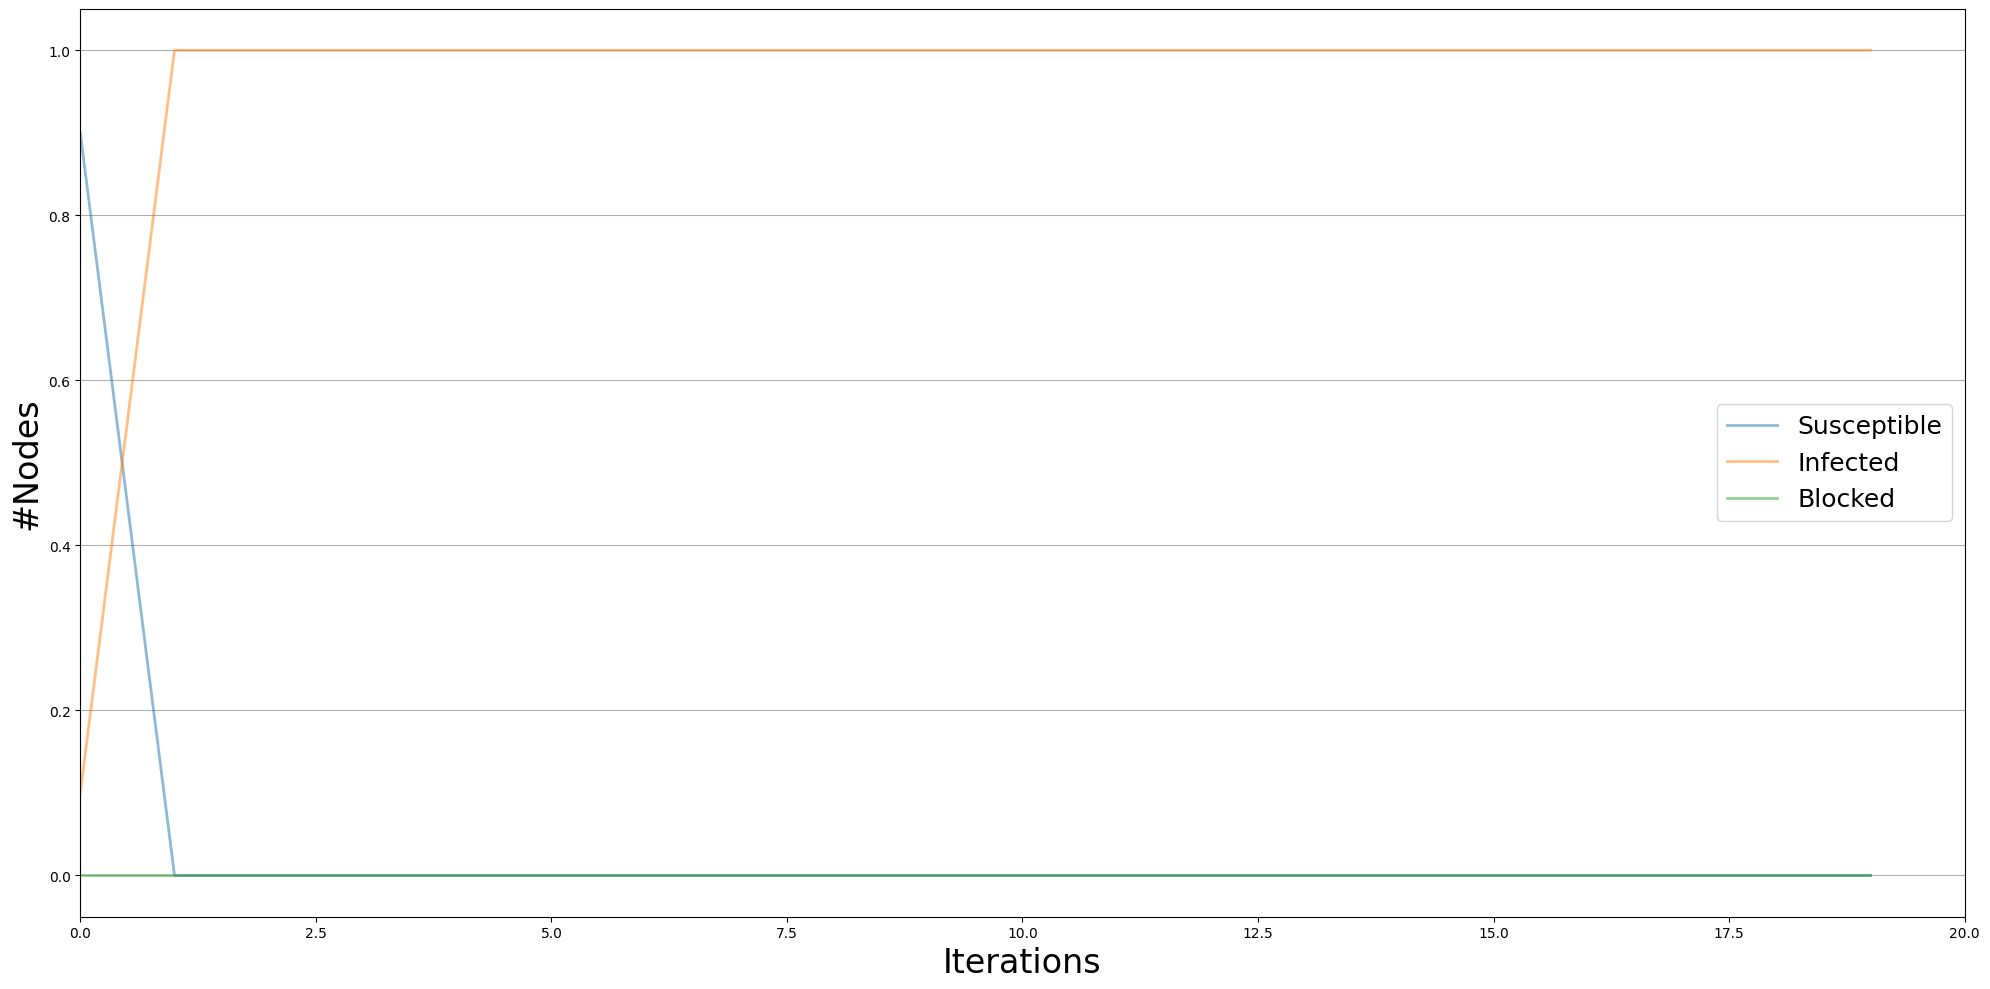

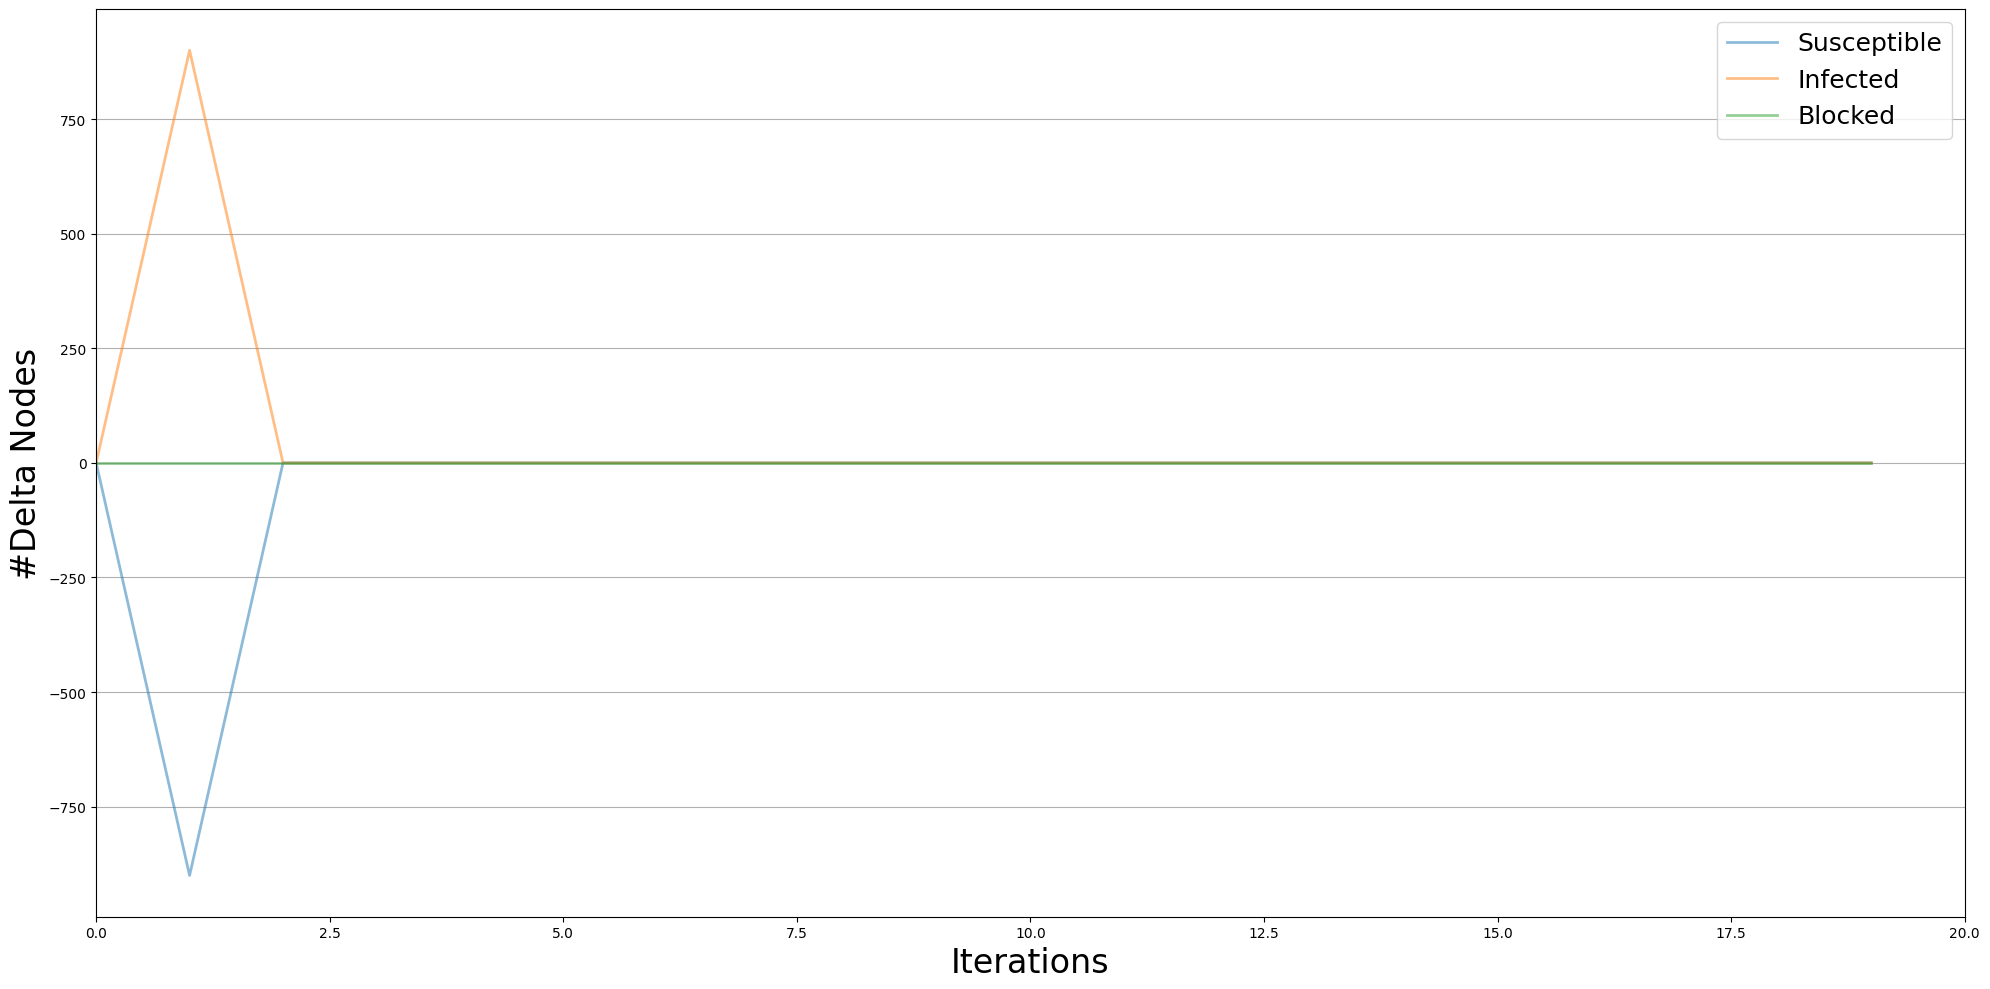

In [59]:
'''
The Profile model assumes that the diffusion process is only apparent; each node decides to adopt or not a given behavior – once known its existence – only on the basis of its own interests.

In this scenario the peer pressure is completely ruled out from the overall model: it is not important how many of its neighbors have adopted a specific behaviour, if the node does not like it, it will not change its interests.

Each node has its own profile describing how likely it is to accept a behaviour similar to the one that is currently spreading.

The diffusion process starts from a set of nodes that have already adopted a given behaviour S:

for each of the susceptible nodes’ in the neighborhood of a node u in S an unbalanced coin is flipped, the unbalance given by the personal profile of the susceptible node;
if a positive result is obtained the susceptible node will adopt the behaviour, thus becoming infected.
if the blocked status is enabled, after having rejected the adoption with probability blocked a node becomes immune to the infection.
every iteration adopter_rate percentage of nodes spontaneous became infected to endogenous effects.

Statuses;
- 0: Suscptible
- 1: Infected
- 2: Blocked

Parameters:
- blocked: The probability that a node will block the adoption of the behavior
- adopter_rate: The percentage of nodes that will adopt the behavior independently from the profile
- fraction_infected: The fraction of initially infected nodes
- profile: The profile of the nodes, this is a value between 0 and 1 that represents the probability that a node will adopt the behavior
'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
import json


# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.ProfileModel(g)
config = mc.Configuration()
config.add_model_parameter('blocked', 0) #inverted the blocked parameter, the higher the value the lower the % of nodes that will be blocked
config.add_model_parameter('adopter_rate', 0) #correct the high number of adopter_rate the higher the % of nodes that will adopt the behavior
config.add_model_parameter('fraction_infected', 0.1)

# Setting nodes parameters
# the % of nodes that will adopt the behavior is inverted, the lower the value the higher the % of nodes that will adopt the behavior
# the higher the value the lower the % of nodes that will adopt the behavior
# 
profile = 0
for i in g.nodes():
    config.add_node_configuration("profile", i, profile)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(20)
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.plot()